The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
temperature profile:


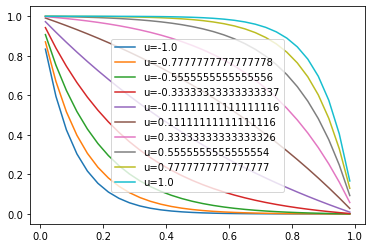

In [2]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import Odin as backend

# in this test I want to test the update() function of fields. When I change the velocity, the backend matrices must be updated

# geometric parameters
LenX = 1
LenY = 0.4
resolution = 30

# thermal conductivity [ W / (m K) ]
k = 0.1

# const temperature at left/right boundaries [K]
T_l = 1
T_r = 0

geom = backend.createGeometry( 'rectangle', [LenX, LenY] )
mesh = backend.createMesh( geom, res=resolution )

myFlowModels = {
    'T' : backend.TransportModels.scalarTransport
#    'T' : backend.TransportModels.ScalarConvectionDiffusion(depVariableName='T', velocityFieldName='u', diffusionCoeffName='k')
}

passiveFields = {
    'u' : 'faces_u',
    'v' : 'faces_v'
}

sim1 = backend.Simulation(myFlowModels, mesh, geom, passiveFields=passiveFields )


myFields = sim1.getFieldRegistry()
T = myFields['T']
T.defineBoundaryCondition(boundaryName='top', boundaryType='zeroGradient')
T.defineBoundaryCondition(boundaryName='bottom', boundaryType='zeroGradient')
T.defineBoundaryCondition(boundaryName='left', boundaryType='fixedValue', value=T_l )
T.defineBoundaryCondition(boundaryName='right', boundaryType='fixedValue', value=T_r )

T.updateSource(0.0, mesh)

myFlowModels['T'].setDiffusionCoefficient(k)


print("temperature profile:")
import matplotlib.pyplot as plt

nbcellsX = sim1._mesh._cells_x
cellSpacing = sim1._mesh._uniformSpacing
L = geom._lenX
xSim = np.linspace(0+0.5*cellSpacing,LenX-0.5*cellSpacing,nbcellsX)
ax = plt.gca()

#for u in [1]:
for u in np.linspace(-1,1,10):
    myFlowModels['T'].setConvectionField( values=(u,0) )

    T.solve()
    ySim = T.data[0,:]
    ax.plot(xSim, ySim, '-', label="u={u}".format(**locals()))

plt.legend()
plt.show()

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)